# Movie data description
## Basic TMDb movie data (https://www.kaggle.com/tmdb/tmdb-movie-metadata)
## + The movie datasets (https://www.kaggle.com/rounakbanik/the-movies-dataset)
### Data description?
#### 1. Categorial columns - 카테고리로 나눌 수 있는 features
#### 2. numerical columns - 수치적 features (연속 + 이산)
#### 3. Mixed data type - 데이터 타입이 섞여 있는 경우 (alphabetic + numeric)
#### 4. Containing errors or typos - Feature 의 value 자체에 에러가 있을 확률이 높은 경우 혹은 비 표준인 것 ex) Name
#### 5. Containing blank or null / empty value - Feature 의 value에 많은 수의 공백이나 null 값이 존재하는 것
#### 6. Data type - 각 Feature 들의 자료형
#### 7. Distribution of numerical features - 수치 데이터 자체의 분포적인 특성

In [2]:
import pandas as pd
import numpy as np
import json

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS


In [3]:
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries',
                    'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

tmdb_movies_df = load_tmdb_movies("data/tmdb_data/tmdb_5000_movies.csv")

In [4]:
# dataframe initialization

#tmdb_movies_df = pd.read_csv("data/tmdb_data/tmdb_5000_movies.csv")
#tmdb_credits_df = pd.read_csv("data/tmdb_data/tmdb_5000_credits.csv")
#keywords_df = pd.read_csv("data/keywords.csv")
#links_df = pd.read_csv("data/links.csv")
#ratings_df = pd.read_csv("data/ratings.csv", 
#                         dtype={'userId' : int, 'movieId' : int, 'rating' : float, 'timestamp' : int})
#meta_df = pd.read_csv("data/movies_metadata.csv")
#credits_df = pd.read_csv("data/credits.csv", 
#                      dtype={'cast' : object, 'crew' : object, 'id' : int})
print("read csv complete")

read csv complete


In [5]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [72]:
# genre=aggregate(genre ~.,data=genre,paste,collapse=",") # remove duplicates

# A look at the genre variety in our dataset
# wordcloud


In [71]:
#Json data extract (genres) and make genres_count and genres_id
genres_count = dict()
genres_dict = dict()
genres_series = tmdb_movies_df.genres
for genres in genres_series:
    for genre in genres:
        genres_dict[genre['name']] = 0
        genres_count[genre['name']] = 0

for genres in genres_series:
    for genre in genres:
        genres_count[genre['name']] += 1

k = 1
for genre in genres_count.keys():
    genres_dict[genre] = k
    k+=1
    
genre_df = pd.DataFrame({"genre" : list(genres_count.keys()), "count" : list(genres_count.values())})
genre_df
#genre_df.hist()

,genre,count
0,Action,1154
1,Adventure,790
2,Fantasy,424
3,Science Fiction,535
4,Crime,696
5,Drama,2297
6,Thriller,1274
7,Animation,234
8,Family,513
9,Western,82


In [11]:
# create new feature named genre_vec

genre_vec = list()

def generate_genre_vec(genre_list):
    genres_vec = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for genre_id in genre_list:
        genres_vec[genre_id - 1] = 1 
    return genres_vec


def generate_genre_list():
    temp_list = list()
    for genres in tmdb_movies_df.genres:
        for genre in genres:
            temp_list.append(genres_dict[genre['name']])
        genre_vec.append(generate_genre_vec(temp_list))
        temp_list = list()

generate_genre_list()
tmdb_movies_df['genre_vec'] = genre_vec
tmdb_movies_df.genre_vec

0       [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3       [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ...
7       [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8       [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
9       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
10      [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
11      [1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
12      [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13      [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
14      [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
15      [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
16      [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
17      [1, 1,

In [67]:
target_movie_title = input("Input movie name : ")
# get title from user and return most 10 similar movies to user
title_vec = dict()
title_distance = dict()
sorted_title_distance = dict()

for title, vec in zip(tmdb_movies_df.title.values, tmdb_movies_df.genre_vec.values):
    title_vec[title] = vec

target_vec = title_vec[target_movie_title]

def cal_distance(target_vec, vec):
    result = 0
    for a, b in zip(target_vec, vec):
        result += pow(a-b, 2)
    return np.sqrt(result)

for title in title_vec.keys():
    title_distance[title] = cal_distance(target_vec, title_vec[title])
    
count = 0
for key, value in sorted(title_distance.items(), key=lambda item: (item[1], item[0])):
    sorted_title_distance[key] = value
    if count >= 100:
        continue
    print ("Title : %s"%key)
    print("Distance : %s"%value)
    print()
    count+=1
    

Input movie name : Avatar
Title : Avatar
Distance : 0.0

Title : Beastmaster 2: Through the Portal of Time
Distance : 0.0

Title : Jupiter Ascending
Distance : 0.0

Title : Man of Steel
Distance : 0.0

Title : Superman
Distance : 0.0

Title : Superman II
Distance : 0.0

Title : Superman Returns
Distance : 0.0

Title : The Wolverine
Distance : 0.0

Title : X-Men: Days of Future Past
Distance : 0.0

Title : 2012
Distance : 1.0

Title : AVP: Alien vs. Predator
Distance : 1.0

Title : After Earth
Distance : 1.0

Title : Ant-Man
Distance : 1.0

Title : Avengers: Age of Ultron
Distance : 1.0

Title : Batman v Superman: Dawn of Justice
Distance : 1.0

Title : Captain America: Civil War
Distance : 1.0

Title : Captain America: The First Avenger
Distance : 1.0

Title : Captain America: The Winter Soldier
Distance : 1.0

Title : Clash of the Titans
Distance : 1.0

Title : Conan the Barbarian
Distance : 1.0

Title : Conan the Destroyer
Distance : 1.0

Title : Damnation Alley
Distance : 1.0

Title

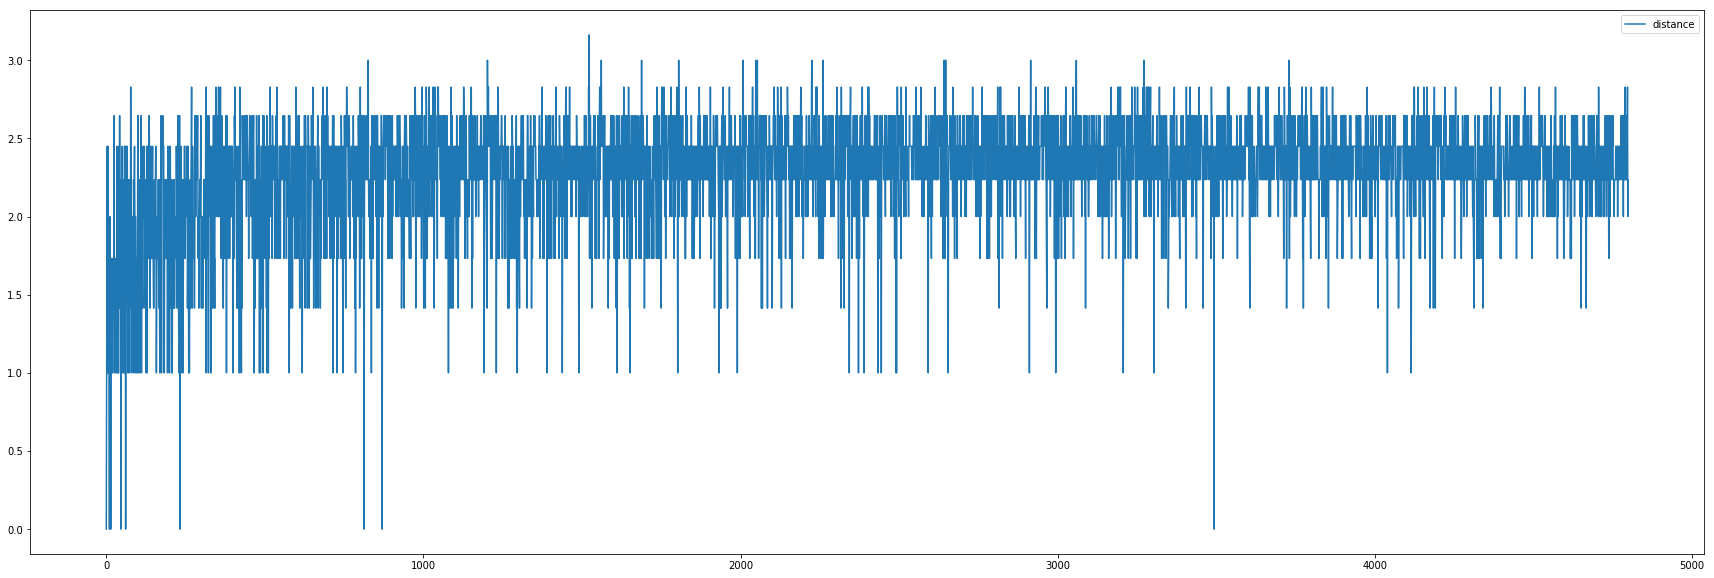

In [36]:
df = pd.DataFrame({'title':list(title_distance.keys()), 'distance':list(title_distance.values())})
hist = df.plot(figsize=(30,10))

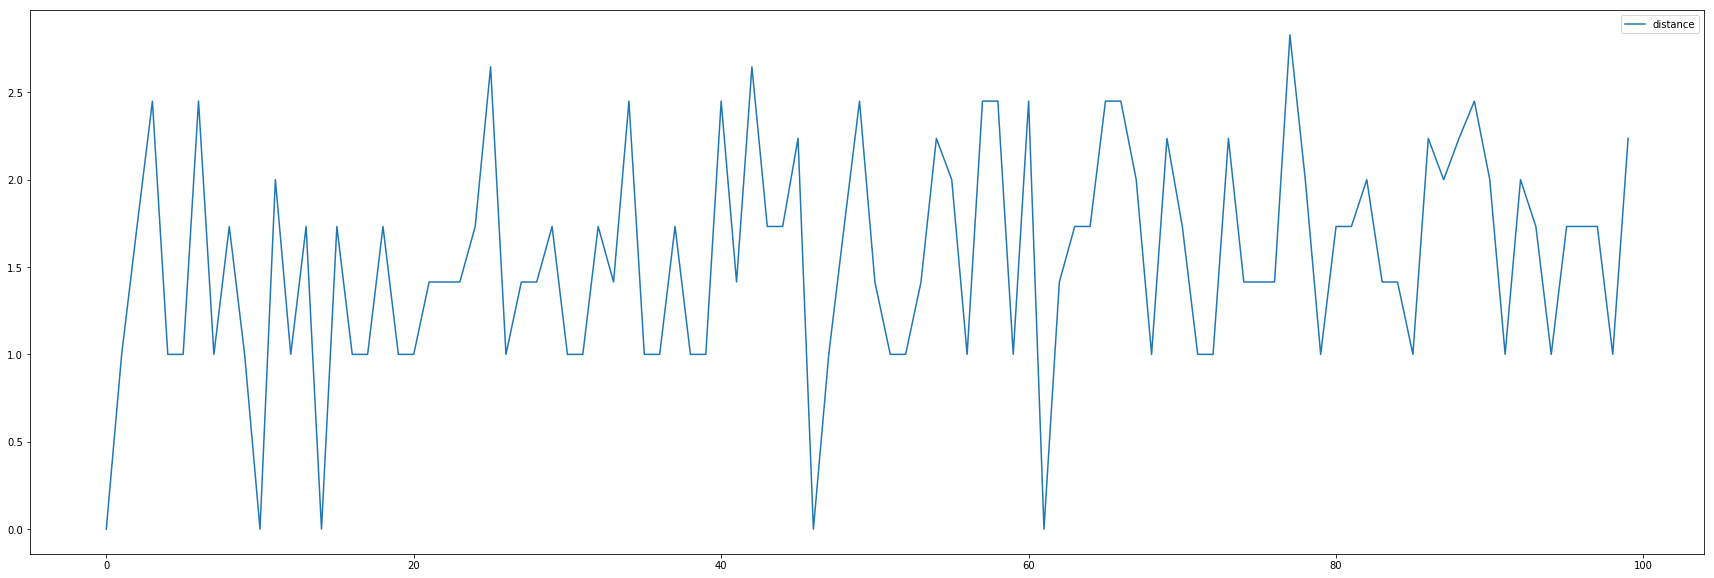

In [40]:
df2 = pd.DataFrame({'title':list(title_distance.keys()), 'distance':list(title_distance.values())})
hist = df2[:100].plot(figsize=(30,10))

In [77]:
company_col = tmdb_movies_df.production_companies
vote_avg_col = tmdb_movies_df.vote_average

company_df = pd.DataFrame(columns=("company_name", "vote_average"))
company_name_list = list()
vote_avg_list = list()
count = 0
for item in company_col:
    for com in item:
        company_name_list.append(com['name'])
        vote_avg_list.append(vote_avg_col[count])
    count+=1
    
company_df = pd.DataFrame({"company name" : list(company_name_list), "vote average" : list(vote_avg_list)})
new_df = company_df.groupby('company name').mean()
new_df.sort_values(by='vote average', ascending=False)


,vote average
company name,
Chase Productions,10.0
Fly High Films,10.0
Arco Films S.L,9.3
Televisa S.A. de C.V.,9.3
Hool/Macdonald Productions,9.3
Producciones San Patricia,9.3
Alfran Productions,8.4
Atman Entertainment,8.3
Knickerbocker Films,8.3


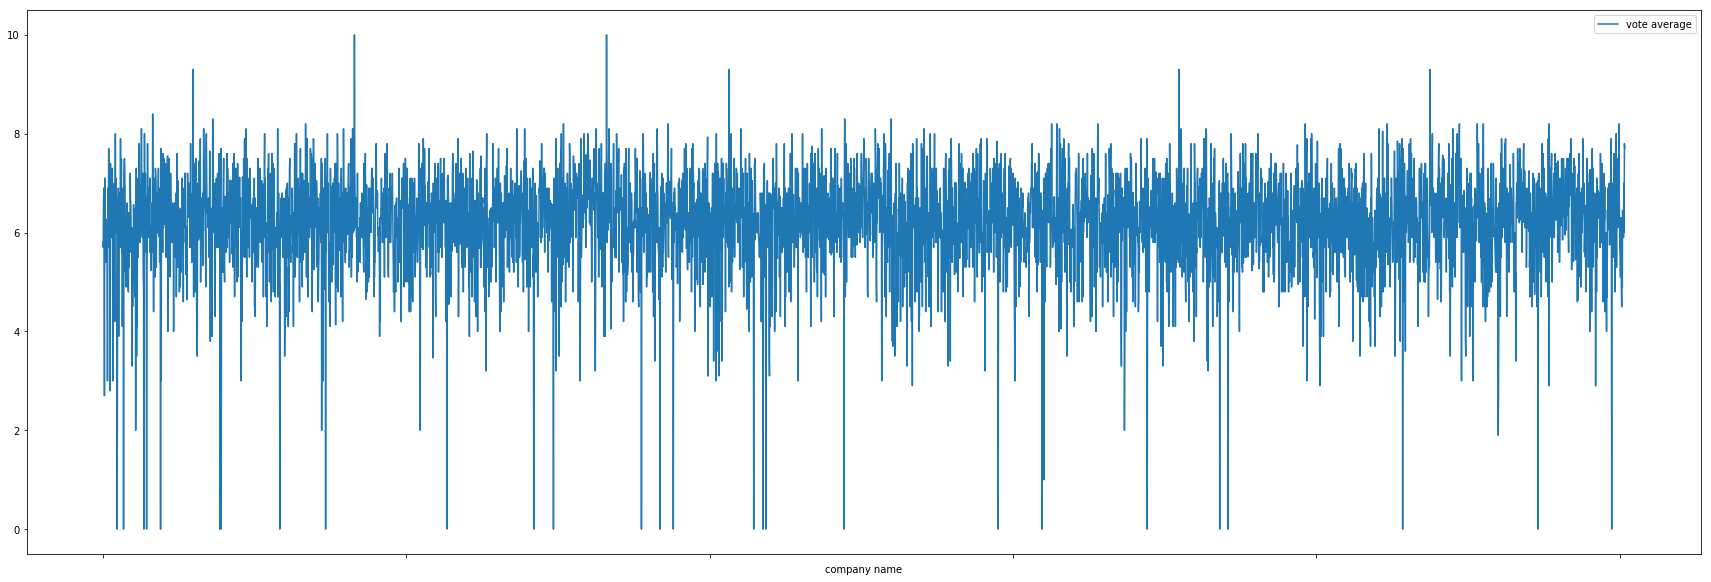

In [66]:
hist = new_df.plot(figsize=(30,10))